# Load & Preprocess Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")


In [3]:
# Display first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Drop unnecessary columns
df = df.drop(columns=["CustomerID"])


In [5]:
# Convert Gender to numerical (0: Female, 1: Male)
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})


In [6]:
# Select features for clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]


In [7]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
            Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


In [8]:
#Checking the size of our data
df.shape

(200, 4)

In [9]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13340\3573476930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


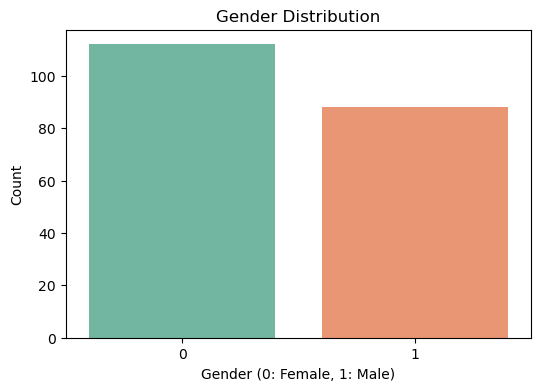

In [11]:
# 2. Countplot for Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

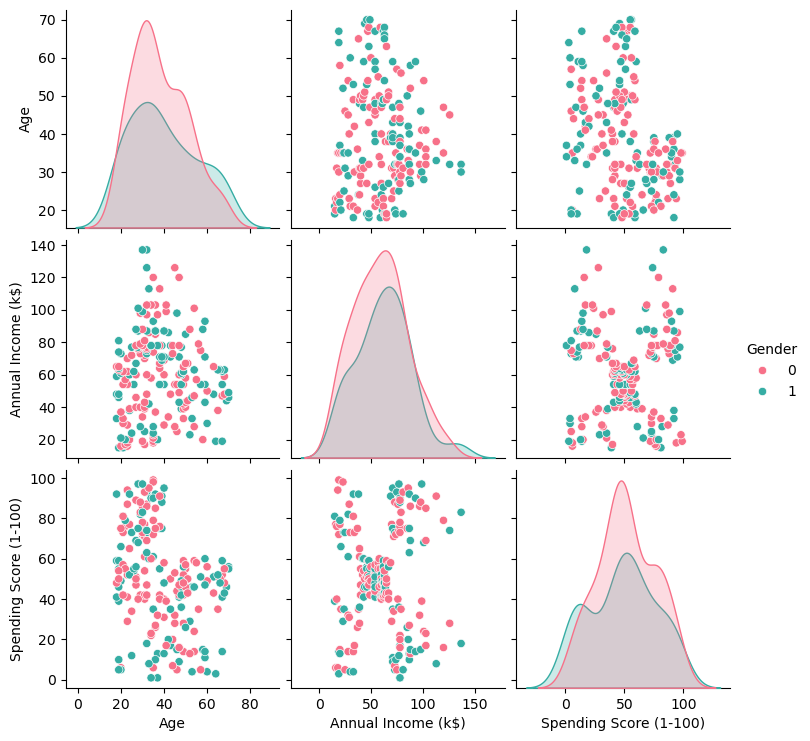

In [12]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df, hue="Gender", palette="husl")
plt.show()



# Find Optimal Clusters Using Dendrogram

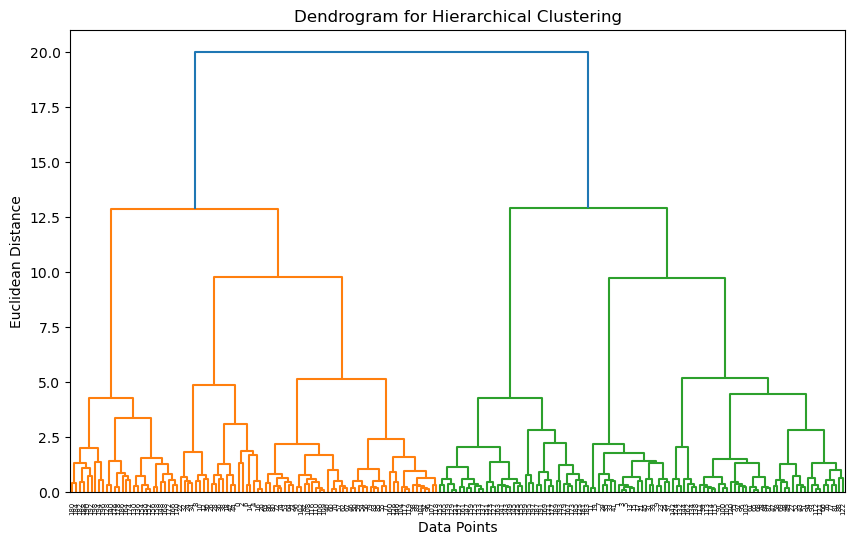

In [14]:
# Create linkage matrix
linked = linkage(X_scaled, method="ward")

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Train Hierarchical Clustering Model & Save It

In [29]:
# Train Agglomerative Clustering Model with k=5
hc_model = AgglomerativeClustering(n_clusters=5, linkage="ward")
df["Cluster"] = hc_model.fit_predict(X_scaled)

# Save the model
with open("hierarchical_model.pkl", "wb") as f:
    pickle.dump(hc_model, f)

print("✅ Model & scaler saved successfully!")

✅ Model & scaler saved successfully!


# Visualize Clusters

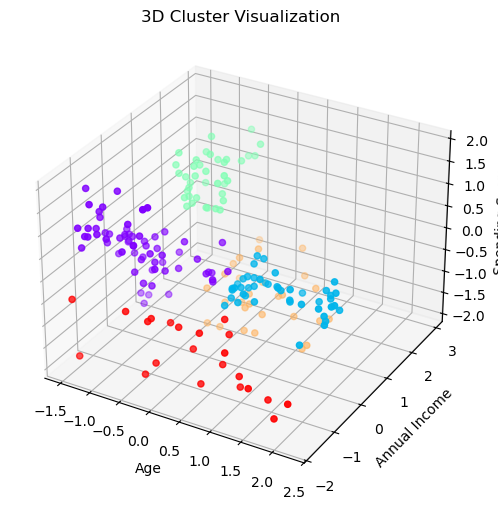

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=df["Cluster"], cmap="rainbow")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")
ax.set_title("3D Cluster Visualization")

plt.show()